In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# loading minst data

In [ ]:
train=pd.read_csv("train.csv")

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.shape

(6304, 785)

In [ ]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,6304.000000,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,...,6303.000000,6303.000000,6303.000000,6303.0,6303.0,6303.0,6303.0,6303.0,6303.0,6303.0
mean,4.440355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.139616,0.142313,0.026971,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.885613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.100344,5.531528,1.675680,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    1
pixel780    1
pixel781    1
pixel782    1
pixel783    1
Length: 785, dtype: int64

In [ ]:
train.fillna(0,inplace=True)

In [ ]:
y = train['label']
x = train.drop("label",axis=1)

In [ ]:
x.iloc[0].values.reshape(28,28)


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 188., 255.,
         94.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
def show_images(num_images):
    for n in range(0,num_images):
        plt.subplot(5,5,n+1)
        plt.imshow(x.iloc[n].values.reshape(28,28))#cmap means how the imgae to be presented
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) 

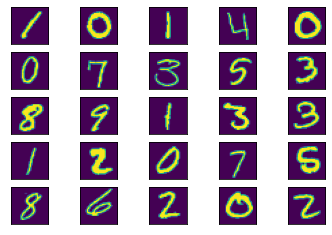

In [ ]:
show_images(25)

In [ ]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

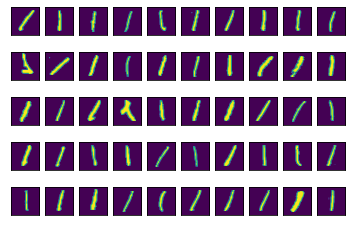

In [ ]:
#def show_images by digit(digit):
digit=1
if digit in list(range(10)):
    indices=np.where(y==digit)#extract indecies where y==1
    for d in range(0,50):
        plt.subplot(5,10,d+1)
        data=x.iloc[indices[0][d]].values.reshape(28,28)
        plt.imshow(data)
        plt.xticks([])
        plt.yticks([])
else:
    print("number doesn't exist")

In [ ]:
def fit_random_forest_classifier_with_plot(X, y):

    #First let's create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    mat = confusion_matrix(y_test, y_preds)
    print(mat)
 #   print(sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5))
    acc = accuracy_score(y_test, y_preds)
    print(acc)
    return acc
    
fit_random_forest_classifier_with_plot(x, y)

[[201   0   1   0   0   1   5   0   1   0]
 [  0 234   3   0   0   0   1   2   3   0]
 [  2   5 213   0   2   0   1   4   0   1]
 [  2   0   4 177   0   4   0   1   1   2]
 [  1   0   0   0 168   0   4   0   0   5]
 [  2   1   0   4   1 169   5   0   4   0]
 [  2   0   1   0   0   2 206   0   0   0]
 [  0   0   7   0   4   0   0 208   2   4]
 [  1   1   0   6   0   3   0   0 189   2]
 [  2   1   0   2  10   1   0   2   4 186]]
0.9375300336376742


0.9375300336376742

## try different number of components for PCA

[[108   0  38   8   7  11  30   0   7   0]
 [  0 209   0   2   1   9   3   7   8   4]
 [ 37   2  73  24  16  22  36   1  12   5]
 [  9   2  33  21  19  29  23  13  28  14]
 [  5   4  19  21  48  16  17  11  11  26]
 [  7   7  31  22  17  24  31   3  33  11]
 [ 28   5  56  23  11  24  33   3  27   1]
 [  2   2   3  12  33   8   4  93   7  61]
 [  6   6  26  27  18  31  27  10  41  10]
 [  2  12   4  17  27  10   4  56  12  64]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.3431042767900048
[[156   0  10   3   1  10  19   1   9   0]
 [  0 225   1   3   2   4   6   0   2   0]
 [ 19   3 122  31   4   3  38   0   7   1]
 [  3   3  57  60   5  15  26   2  16   4]
 [  6   0   4   4  99  16   1  11   8  29]
 [  7   0   9  17  22  64  26   7  27   7]
 [ 16   9  19  16   2  12 127   0  10   0]
 [  0   2   0   3  24   9   1 115   9  62]
 [ 16   2   6  28  27  39  34   0  49   1]
 [  2   2   1   2  45   2   1  51  10  92]]
AxesSubplot(0.125,0.125;0.496x0.755)
0.5329168668909178
[[174   0   6   0   4  11  

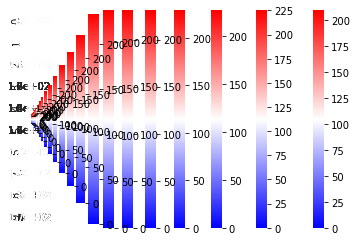

In [ ]:
x=StandardScaler().fit_transform(x)
for com in range(2,100):
    pca=PCA(com)
    x_pca=pca.fit_transform(x)
    acc=fit_random_forest_classifier_with_plot(x_pca, y)
    if acc>0.90:
        print("With only {} components, a random forest acheived an accuracy of {}.".format(comp, acc))
        break

## try components based on accuracy

In [ ]:
def fit_random_forest_classifier(X, y):

    #First let's create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)
    acc = accuracy_score(y_test, y_preds)
    return acc

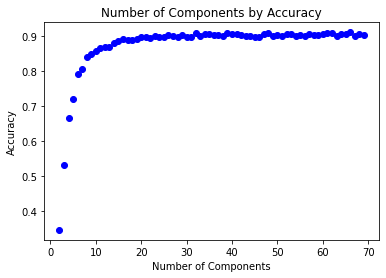

In [ ]:
x=StandardScaler().fit_transform(x)
accs=[]
comps=[]
for comp in range(2,70):
    pca=PCA(comp)
    x_pca=pca.fit_transform(x)
    acc=fit_random_forest_classifier(x_pca, y)
    comps.append(comp)
    accs.append(acc)

plt.plot(comps,accs,'bo')
plt.xlabel('Number of Components');
plt.ylabel('Accuracy');
plt.title('Number of Components by Accuracy');

In [ ]:
np.max(accs),comps[np.where(accs == np.max(accs))[0][0]]

(0.9106198942815954, 66)

show amount of variance explained by each component

In [ ]:
pca.components_.shape

(64, 784)

In [ ]:
x_pca.shape

(6304, 64)

In [ ]:
x.shape

(6304, 784)

In [ ]:
y[0]

1

In [ ]:
pca=PCA(64)
x_pca=pca.fit_transform(x)
acc=fit_random_forest_classifier(x_pca, y)
acc

0.9154252763094666

([], [])

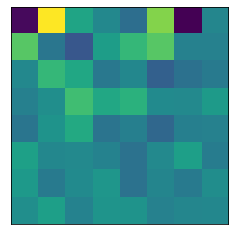

In [ ]:
plt.imshow(x_pca[0].reshape(8,8))#cmap means how the imgae to be presented
plt.xticks([]) #removes numbered labels on x-axis
plt.yticks([]) 

([], [])

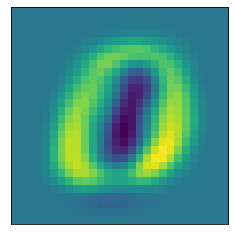

In [ ]:
plt.imshow(pca.components_[0].reshape(28,28))#cmap means how the imgae to be presented
plt.xticks([]) #removes numbered labels on x-axis
plt.yticks([]) 

In [ ]:
pca=PCA(15)
x_pca=pca.fit_transform(x)
acc=fit_random_forest_classifier(x_pca, y)
acc

0.9005285920230658

# See The amount of variability captured by the component.

Text(0.5, 1.0, 'Explained Variance Per Principal Component')

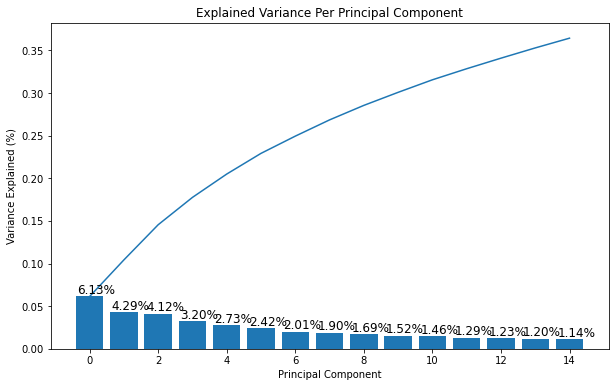

In [ ]:
num_components = len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_
cumvals=np.cumsum(vals)
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
ax.bar(ind,vals)
ax.plot(ind,cumvals)
for i in range(num_components):
    ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)



ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')
plt.show()

**********

# some notes

**Principal components** are also known as **eigenvectors**.

An eigenvalue is the same as the amount of variability captured by a principal component, and an eigenvector is a principal component itself

In [ ]:
PCA for microarray data.
PCA for anomaly detection.
PCA for time series data.

each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

In [ ]:
def  map_weights_features(pca,df,n):
    weights=pd.DataFrame(np.round(pca.components_, 6), columns=fd.keys())
    component=weights.iloc[n-1]
    return component.sort_values(ascending=False)

In [ ]:
def plot_component(component,n):
    component= pd.concat([component.head(5),component.tail(5)])
    component.plot(kind='bar')
    plt.title(f'component{n}')
    plt.show()

In [ ]:
comp=1
component=map_weights_features(pca,fd,comp)
plot_component(component,comp)
print(component)

****

## The dummy variables are columns with only 1 and 0 values in the dataset

Principal components are orthogonal, span the directions of maximum variability, and the corresponding eigenvalues tell us how much of the original variability is explained by each component

In [ ]:
def pca_results(full_dataset, pca):

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
Dimension 1,0.0965,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,-0.0001,-0.0000,-0.0000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Dimension 2,0.0715,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0003,-0.0003,-0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimension 3,0.0606,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0003,-0.0003,-0.0001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Dimension 4,0.0550,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0002,0.0003,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimension 5,0.0481,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0002,-0.0002,-0.0001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Dimension 6,0.0432,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0001,-0.0002,-0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimension 7,0.0322,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,...,-0.0002,-0.0003,-0.0000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Dimension 8,0.0290,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0003,0.0003,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimension 9,0.0282,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0008,0.0008,0.0001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Dimension 10,0.0238,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,...,0.0002,0.0005,0.0000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


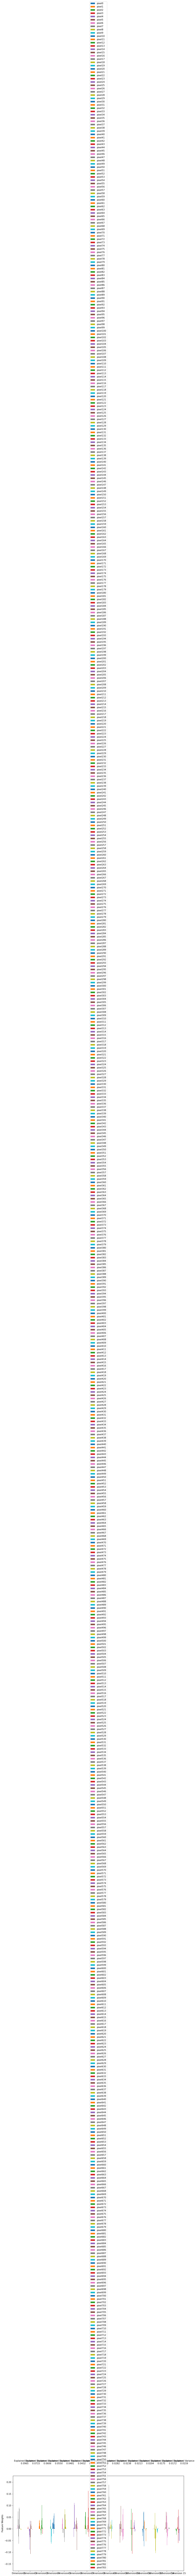

In [ ]:
pca_results(x,pca)